In [1]:
# Seaborn plot templates using the provided datasets.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(style="whitegrid")

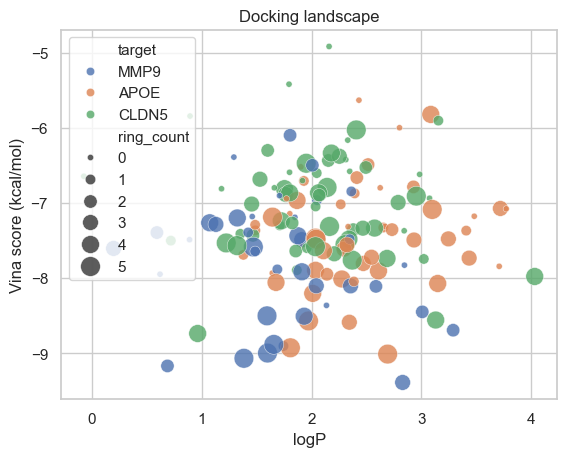

In [4]:
 #1) Scatter with multiple semantics (Docking)
df = pd.read_csv("docking_scores.csv")
g = sns.scatterplot(data=df, x="logP", y="vina_score", hue="target", size="ring_count", sizes=(20, 200), alpha=0.8)
g.set(title="Docking landscape", ylabel="Vina score (kcal/mol)")
plt.show()


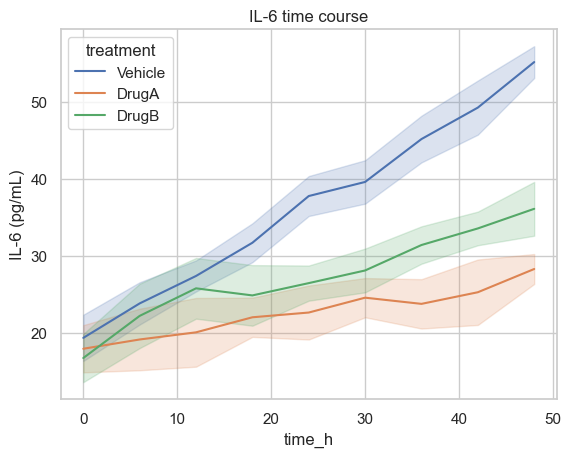

In [5]:
# 2) Lineplot with error bands (Cytokines over time)
df = pd.read_csv("timecourse_cytokines.csv")
g = sns.lineplot(data=df, x="time_h", y="IL6", hue="treatment", errorbar=("sd"))
g.set(title="IL-6 time course", ylabel="IL-6 (pg/mL)")
plt.show()

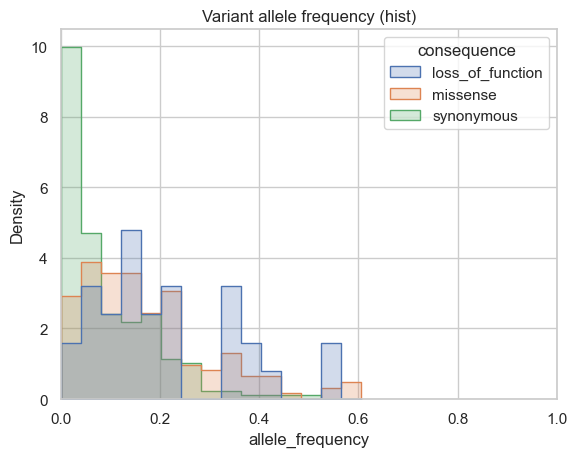

In [6]:
 # 3) Distributions: hist + kde + ecdf (Variants)
df = pd.read_csv("variants.csv")
g = sns.histplot(data=df, x="allele_frequency", hue="consequence", element="step", stat="density", common_norm=False)
g.set(title="Variant allele frequency (hist)", xlim=(0,1))
plt.show()


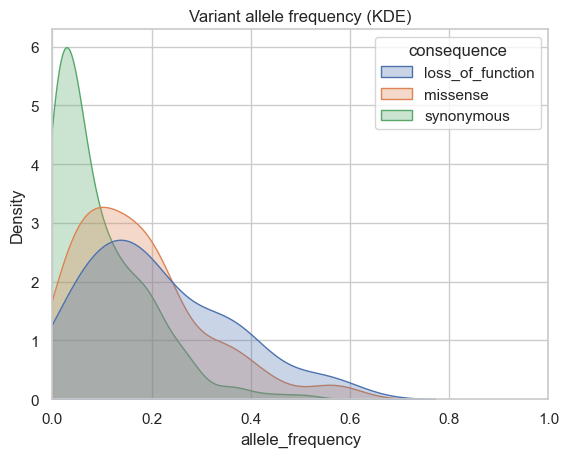

In [7]:
g = sns.kdeplot(data=df, x="allele_frequency", hue="consequence", common_norm=False, fill=True, alpha=0.3)
g.set(title="Variant allele frequency (KDE)", xlim=(0,1))
plt.show()

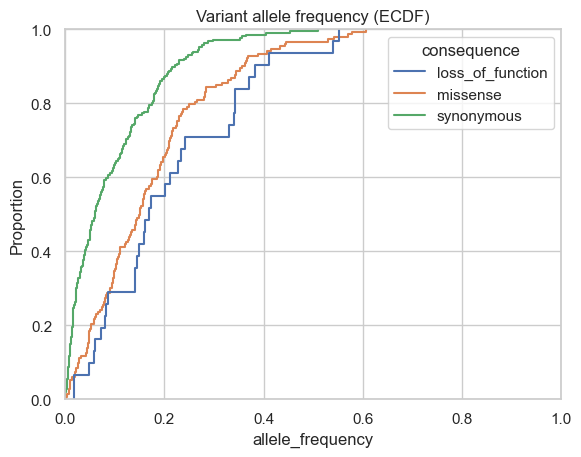

In [8]:
 g= sns.ecdfplot(data=df, x="allele_frequency", hue="consequence")
g.set(title="Variant allele frequency (ECDF)", xlim=(0,1))
plt.show()

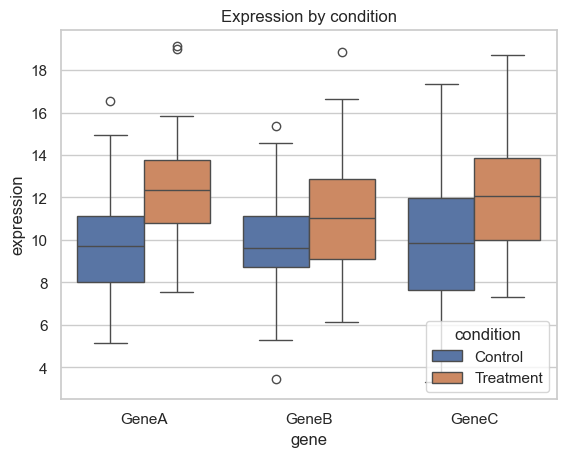

In [11]:
# 4) Categorical comparisons (Gene expression)
df = pd.read_csv("gene_expression.csv")
g = sns.boxplot(data=df, x="gene", y="expression", hue="condition")
g.set(title="Expression by condition")
plt.show()


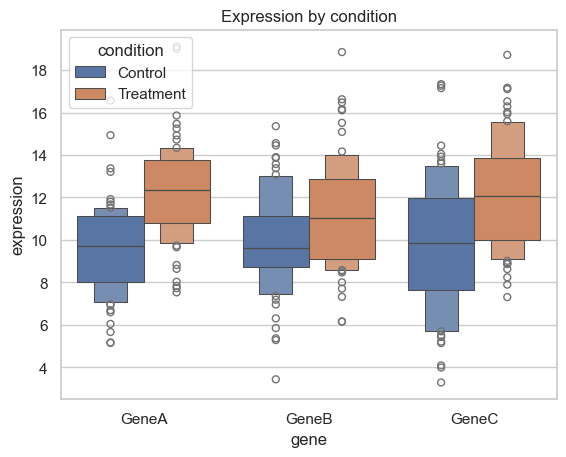

In [12]:
# 4) Categorical comparisons (Gene expression)
df = pd.read_csv("gene_expression.csv")
g = sns.boxenplot(data=df, x="gene", y="expression", hue="condition")
g.set(title="Expression by condition")
plt.show()


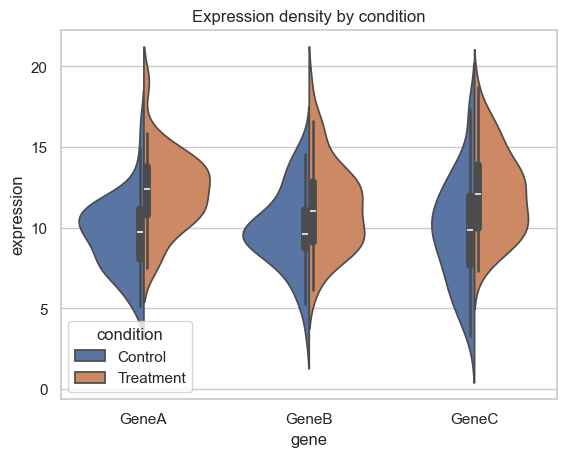

In [13]:
g = sns.violinplot(data=df, x="gene", y="expression", hue="condition", split=True)
g.set(title="Expression density by condition")
plt.show()

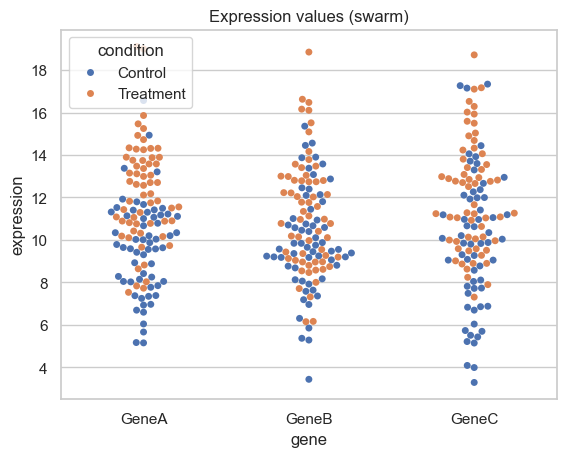

In [14]:
g = sns.swarmplot(data=df, x="gene", y="expression", hue="condition")
g.set(title="Expression values (swarm)")
plt.show()

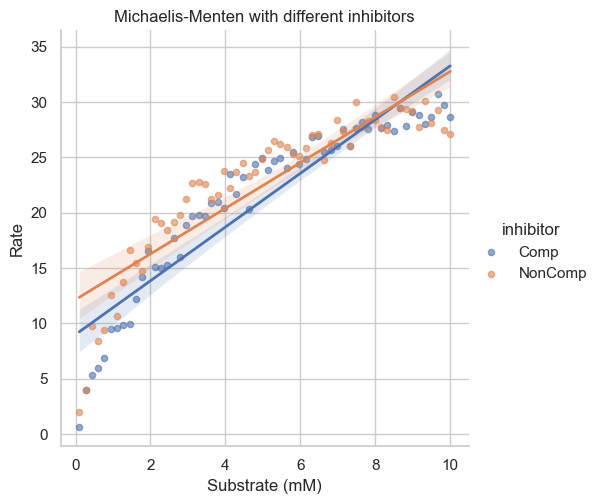

In [15]:
# 5) Regression / lmplot (Enzyme kinetics)
df = pd.read_csv("enzyme_kinetics.csv")
g = sns.lmplot(data=df, x="substrate_conc", y="rate", hue="inhibitor", scatter_kws={"s":20, "alpha":0.6}, line_kws={"lw":2})
g.set(xlabel="Substrate (mM)", ylabel="Rate", title="Michaelis-Menten with different inhibitors")

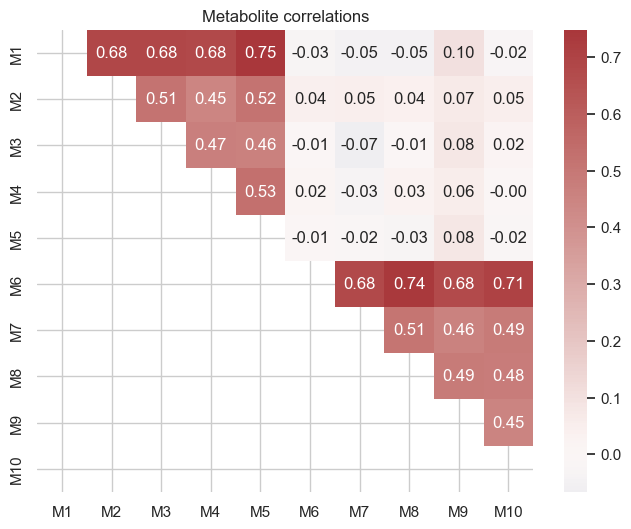

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np   # ✅ add this

# 6) Correlation heatmap (Metabolites)
df = pd.read_csv("metabolites.csv")
corr = df.corr(numeric_only=True)

# create mask for upper triangle
mask = pd.DataFrame(True, index=corr.index, columns=corr.columns)
mask.values[np.triu_indices_from(mask, 1)] = False  

plt.figure(figsize=(8,6))
g = sns.heatmap(corr, mask=mask, cmap="vlag", center=0, annot=True, fmt=".2f")
plt.title("Metabolite correlations")
plt.show()


In [20]:
!pip install scipy

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   -------------- ------------------------- 13.9/38.6 MB 67.2 MB/s eta 0:00:01
   ----------------------------- ---------- 28.3/38.6 MB 66.5 MB/s eta 0:00:01
   ---------------------------------------  38.5/38.6 MB 66.2 MB/s eta 0:00:01
   ---------------------------------------- 38.6/38.6 MB 52.2 MB/s eta 0:00:00


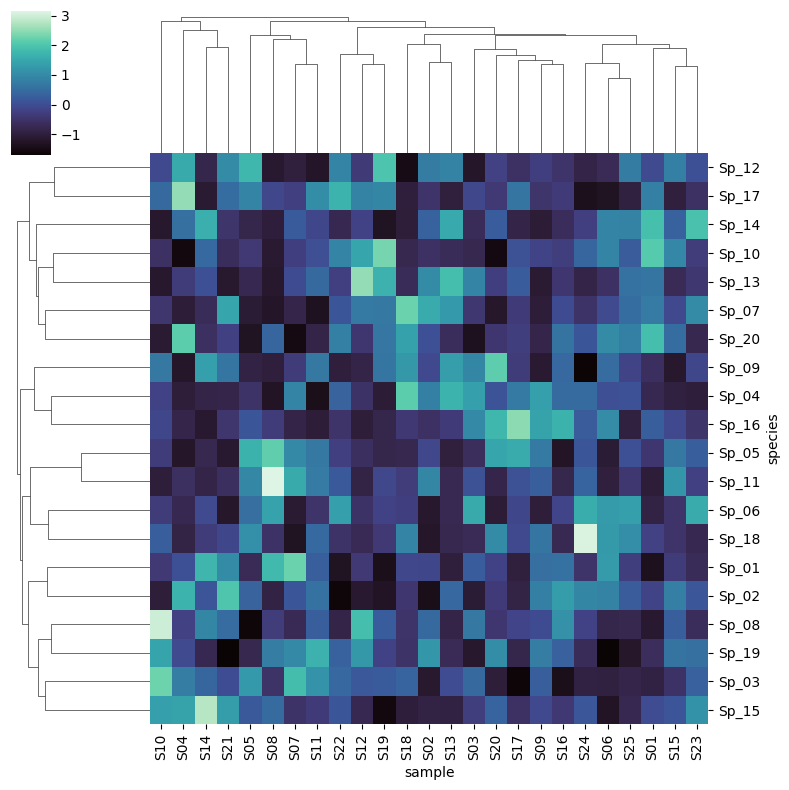

In [3]:
# 7) Clustermap (Microbiome)
df = pd.read_csv("microbiome_abundance.csv")
piv = df.pivot_table(index="species", columns="sample", values="relative_abundance", fill_value=0)
# Clustermap auto-scales; z-score across rows is often informative:
sns.clustermap(piv, cmap="mako", z_score=0, figsize=(8,8))
plt.show()

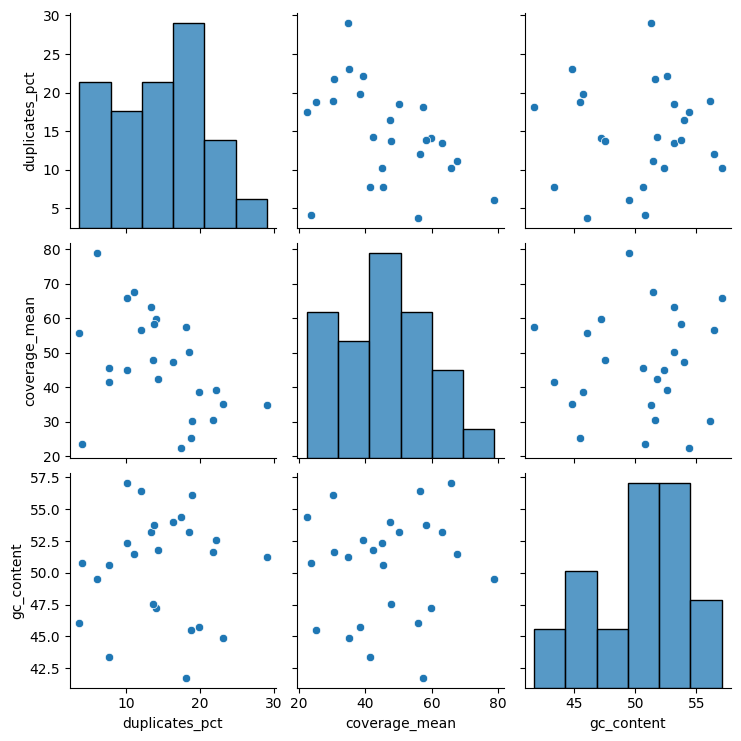

In [4]:
# 8) Pairplot (QC metrics)
df = pd.read_csv("qc_metrics.csv")
sns.pairplot(df, vars=["duplicates_pct","coverage_mean","gc_content"])
plt.show()

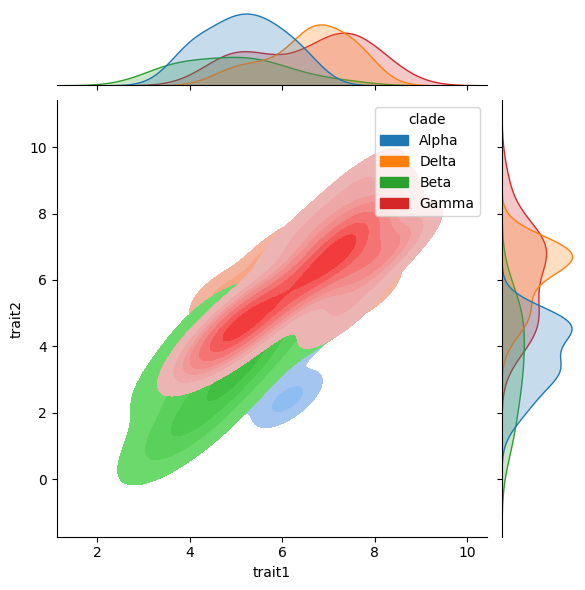

In [5]:
# 9) Jointplot (Traits)
df = pd.read_csv("phylo_traits.csv")
sns.jointplot(data=df, x="trait1", y="trait2", hue="clade", kind="kde", fill=True)
plt.show()

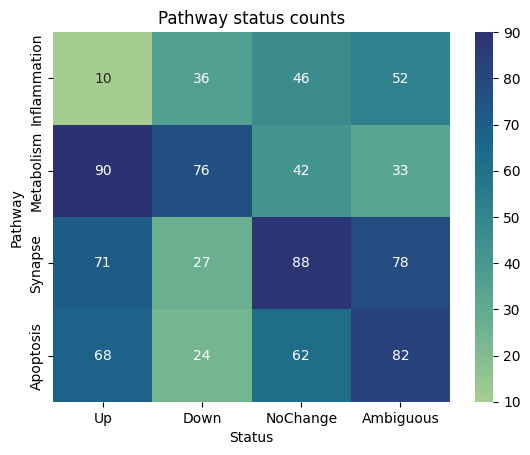

In [6]:
# 10) Annotated heatmap (Pathway x Status)
df = pd.read_csv("pathway_status_table.csv", index_col=0)
plt.figure()
sns.heatmap(df, annot=True, fmt="d", cmap="crest")
plt.title("Pathway status counts")
plt.ylabel("Pathway"); plt.xlabel("Status")
plt.show()